In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# 한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

# 인구수 추이

In [53]:
# 데이터 불러오기
df_pop = pd.read_csv('pdsample/population(2015-2019).csv', encoding='cp949')
df_pop.head()

,행정구역별(읍면동),연령별,2015,2016,2017,2018,2019
0,행정구역별(읍면동),연령별,내국인(명),내국인(명),내국인(명),내국인(명),내국인(명)
1,전국,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,NaN,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,NaN,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,NaN,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [54]:
df_pop = df_pop.drop(['행정구역별(읍면동)'], axis='columns')
df_pop.head()

,연령별,2015,2016,2017,2018,2019
0,연령별,내국인(명),내국인(명),내국인(명),내국인(명),내국인(명)
1,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [55]:
df_pop = df_pop[df_pop['연령별']!='연령별'].copy()
df_pop.head()

,연령별,2015,2016,2017,2018,2019
1,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [56]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop[i] = df_pop[i].str.replace(',','')

In [57]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop[i] = df_pop[i].astype(int)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     4 non-null      object
 1   2015    4 non-null      int32 
 2   2016    4 non-null      int32 
 3   2017    4 non-null      int32 
 4   2018    4 non-null      int32 
 5   2019    4 non-null      int32 
dtypes: int32(5), object(1)
memory usage: 144.0+ bytes


In [58]:
df_pop

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545,3056728,2891577,2735274,2595613
2,15세미만,6906707,6768338,6631762,6479881,6311951
3,15~64세,36229874,36312340,36196132,36103955,35942771
4,65세이상,6569082,6775118,7115366,7394115,7745563


In [59]:
df_pop.loc[5,'연령별'] = ['19세 미만']
df_pop.loc[6,'연령별'] = ['19세 이상']

In [60]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop.loc[5,i] = df_pop.loc[1,i] + df_pop.loc[2,i]

In [61]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop.loc[6,i] = df_pop.loc[3,i] + df_pop.loc[4,i] - df_pop.loc[1,i]

In [62]:
df_pop

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545.0,3056728.0,2891577.0,2735274.0,2595613.0
2,15세미만,6906707.0,6768338.0,6631762.0,6479881.0,6311951.0
3,15~64세,36229874.0,36312340.0,36196132.0,36103955.0,35942771.0
4,65세이상,6569082.0,6775118.0,7115366.0,7394115.0,7745563.0
5,19세 미만,10077252.0,9825066.0,9523339.0,9215155.0,8907564.0
6,19세 이상,39628411.0,40030730.0,40419921.0,40762796.0,41092721.0


In [65]:
df_pop

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545.0,3056728.0,2891577.0,2735274.0,2595613.0
2,15세미만,6906707.0,6768338.0,6631762.0,6479881.0,6311951.0
3,15~64세,36229874.0,36312340.0,36196132.0,36103955.0,35942771.0
4,65세이상,6569082.0,6775118.0,7115366.0,7394115.0,7745563.0
5,19세 미만,10077252.0,9825066.0,9523339.0,9215155.0,8907564.0
6,19세 이상,39628411.0,40030730.0,40419921.0,40762796.0,41092721.0


In [69]:
df_pop_19 = df_pop[df_pop['연령별'].str.contains('19세 ')]
df_pop_19.head()

,연령별,2015,2016,2017,2018,2019
5,19세 미만,10077252.0,9825066.0,9523339.0,9215155.0,8907564.0
6,19세 이상,39628411.0,40030730.0,40419921.0,40762796.0,41092721.0


In [70]:
df_pop_19_m = df_pop_19.melt(id_vars='연령별')
df_pop_19_m

,연령별,variable,value
0,19세 미만,2015,10077252.0
1,19세 이상,2015,39628411.0
2,19세 미만,2016,9825066.0
3,19세 이상,2016,40030730.0
4,19세 미만,2017,9523339.0
5,19세 이상,2017,40419921.0
6,19세 미만,2018,9215155.0
7,19세 이상,2018,40762796.0
8,19세 미만,2019,8907564.0
9,19세 이상,2019,41092721.0


In [71]:
df_pop_19_m = df_pop_19_m.rename(columns={'variable':'연도', 'value':'인구수'})

In [ ]:
df_pop_19_m.loc[]

In [79]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만']

,연령별,연도,인구수
0,19세 미만,2015,10077252.0
2,19세 미만,2016,9825066.0
4,19세 미만,2017,9523339.0
6,19세 미만,2018,9215155.0
8,19세 미만,2019,8907564.0


<AxesSubplot:xlabel='연도'>

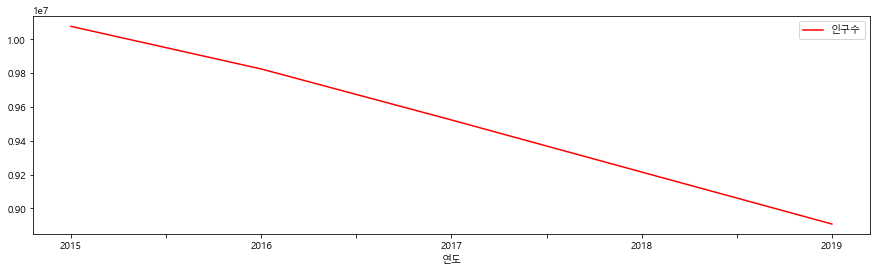

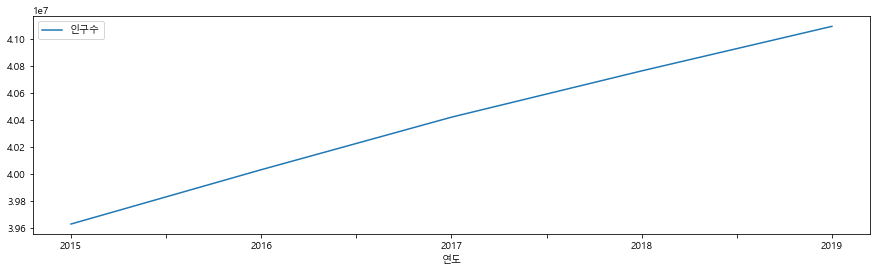

In [108]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만'].set_index(['연도']).plot(figsize=(15,4), color = 'red')
df_pop_19_m[df_pop_19_m['연령별']=='19세 이상'].set_index(['연도']).plot(figsize=(15,4))

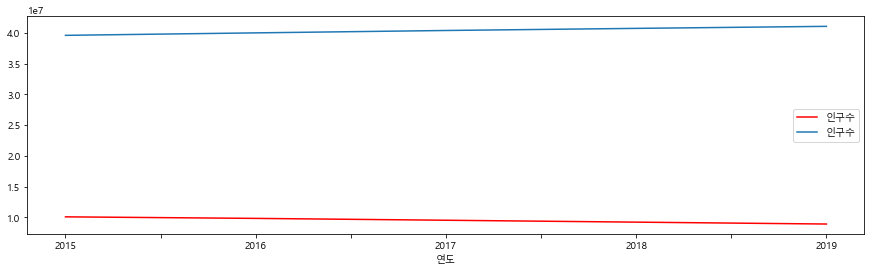

In [111]:
df_under = df_pop_19_m[df_pop_19_m['연령별']=='19세 미만'].set_index(['연도']).plot(color='red')
df_top = df_pop_19_m[df_pop_19_m['연령별']=='19세 이상'].set_index(['연도']).plot(ax=df_under, figsize=(15,4))

**19세 미만** 인구는 감소하고 있고 **19세 이상** 인구는 증가하고 있음

# 소년 중 범죄자 수